In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import simulated_data as sim
import accuracy_metrics as ac
import os
import re

In [12]:
out_files = os.listdir("../../HMM_Test_Outputs/")
out_files = [out_files[i] for i in range(len(out_files)) if re.search("^sim.+tsv$", out_files[i])]
out_files = [out_files[i] for i in range(len(out_files)) if re.search("mix", out_files[i])]

In [13]:
file = out_files[0]
re.sub("^simAdmixedGenome_([0-9]+?)_.+$", "\\1", file)

'5000'

In [23]:
accuracies = []
skew = []
recomb_rate = []
admix = []
dataset = []
for file in out_files:
    pred = pd.read_csv("../../HMM_Test_Outputs/"+file, sep="\t", index_col=False)
    original_file = re.sub("_recomb.+", ".tsv", file)
    try:
        truth = pd.read_csv("Data/"+original_file, sep= "\t", index_col=False)
        accuracies.append(ac.accuracy(pred, truth))
        _, s = ac.pivot_accuracy(pred, truth)
        skew.append(s)
        rr = re.sub("^.+recomb(.+)_HMMoutput.tsv", "\\1", file)
        recomb_rate.append(rr)
        dataset.append(re.sub("^sim[a-zA-Z]+?Genome_([0-9]+?)_.+$", "\\1", file))
        if re.search("Rx", file):
            ad = re.sub("^.+Rx([0-9]+)_.+", "\\1", file)
            admix.append(ad)
        else:
            admix.append(0)
    except FileNotFoundError:
        try:
            #truth = pd.read_csv("../../simulated_files/"+original_file, sep= "\t", index_col=False)
            # Lauryn added because files were all missing position 0, change back to original above when issue is fixed!
            truth = pd.read_csv("../../simulated_files/"+original_file, sep= "\t", index_col=False).iloc[1:]
            accuracies.append(ac.accuracy(pred, truth))
            _, s = ac.pivot_accuracy(pred, truth)
            skew.append(s)
            rr = re.sub("^.+recomb(.+)_HMMoutput.tsv", "\\1", file)
            recomb_rate.append(rr)
            dataset.append(re.sub("^sim[a-zA-Z]+?Genome_([0-9]+?)_.+$", "\\1", file))
            if re.search("Rx", file):
                ad = re.sub("^.+Rx([0-9]+)_.+", "\\1", file)
                admix.append(ad)
            else:
                admix.append(0)
        except FileNotFoundError:
            print("NOT FOUND", original_file)
        
results = pd.DataFrame({"test": out_files, "recomb": recomb_rate, "N_admix":admix, "accuracy":accuracies, "skew":skew, "dataset":dataset}, dtype=float)

In [24]:
r5000 = results.loc[results.dataset==5000]
r5000.sort_values(by="test")

,test,recomb,N_admix,accuracy,skew,dataset
211,simAdmixedGenome_5000_0_1_Rx10_0_recomb0.00013...,0.00013,10.0,0.505001,0.25,5000.0
193,simAdmixedGenome_5000_0_1_Rx10_0_recomb0.0001_...,0.00010,10.0,0.504901,0.25,5000.0
82,simAdmixedGenome_5000_0_1_Rx10_0_recomb0.0002_...,0.00020,10.0,0.506201,0.25,5000.0
173,simAdmixedGenome_5000_0_1_Rx10_0_recomb0.0004_...,0.00040,10.0,0.507802,0.25,5000.0
45,simAdmixedGenome_5000_0_1_Rx10_0_recomb0.001_H...,0.00100,10.0,0.509002,0.25,5000.0
...,...,...,...,...,...,...
65,simAdmixedGenome_5000_0_1_Rx5_1_recomb0.1_HMMo...,0.10000,5.0,0.828566,1.00,5000.0
179,simAdmixedGenome_5000_0_1_Rx5_1_recomb0.2_HMMo...,0.20000,5.0,0.816863,1.80,5000.0
56,simAdmixedGenome_5000_0_1_Rx5_1_recomb0.3_HMMo...,0.30000,5.0,0.806261,3.20,5000.0
75,simAdmixedGenome_5000_0_1_Rx5_1_recomb0.4_HMMo...,0.40000,5.0,0.793959,12.80,5000.0


Text(0.5, 1.0, 'Accuracy at varying recombination rate, colored by Rx')

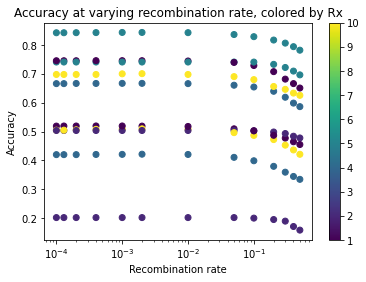

In [25]:
plt.scatter(data=results[results.dataset == 5000], x="recomb", y="accuracy", c="N_admix")
plt.colorbar()
plt.xlabel("Recombination rate")
plt.ylabel("Accuracy")
plt.xscale("log")
plt.title("Accuracy at varying recombination rate, colored by Rx")

Text(0.5, 1.0, 'Skew at varying recombination rate, colored by Rx')

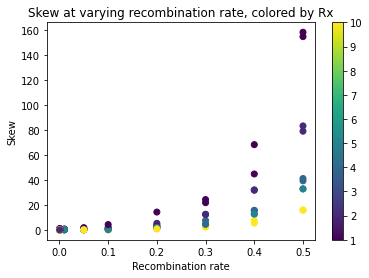

In [26]:
plt.scatter(data=results[results.dataset==5000], x="recomb", y="skew", c="N_admix")
plt.colorbar()
plt.xlabel("Recombination rate")
plt.ylabel("Skew")
plt.title("Skew at varying recombination rate, colored by Rx")

Text(0.5, 1.0, 'Skew at varying recombination rate, colored by Rx')

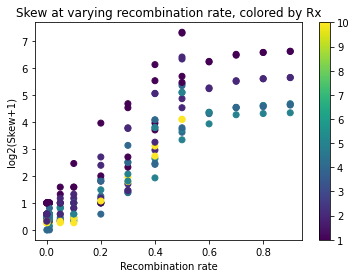

In [27]:
results["log_skew"] = results["skew"].apply(lambda x: np.log2(x+1))
plt.scatter(data=results, x="recomb", y="log_skew", c="N_admix")
plt.colorbar()
plt.xlabel("Recombination rate")
plt.ylabel("log2(Skew+1)")
plt.title("Skew at varying recombination rate, colored by Rx")

0.5849625007211562